# Exercise solutions

## Exercise 1

A) Write a program implementing a linear congruential generator (LCG). Be sure that the program works correctly using only integer representation.

**Linear Congruential Generator (LCG)**

An LCG has the form:

$$
X_{n+1} = (a \cdot X_n + c) \mod m
$$

Where:

- \( a \): multiplier  
- \( c \): shift 
- \( m \): modulus  
- \( X_0 \): initial value (seed)


In [40]:
# Linear Congruential Generator (LCG) implementation
def lcg(n, a, c, m, seed=seed):
    x = seed
    numbers = []
    for _ in range(n):
        x = (a * x + c) % m
        numbers.append(x / m)  # Normaliser til [0,1)
    return numbers


# Histogram of generated numbers
def histogram_data(numbers, num_bins, min_val, max_val):
    bin_width = (max_val - min_val) / num_bins
    hist_counts = [0] * num_bins
    
    for val in numbers:
        bin_index = int((val - min_val) / bin_width)
        if bin_index >= num_bins:  # Clamp to last bin if val == 1.0 (rare but safe)
            bin_index = num_bins - 1
        hist_counts[bin_index] += 1
    
    return hist_counts

def histogram_plot(num_bins, min_val, max_val, hist_counts):
    bin_width = (max_val - min_val) / num_bins
    histogram_text = ""
    
    for i in range(num_bins):
        start = min_val + i * bin_width
        end = start + bin_width
        bar = '█' * int((hist_counts[i] / max(hist_counts)) * 40)
        label = f"[{start:.1f}, {end:.1f})"
        histogram_text += f"{label.ljust(14)} | {bar} ({hist_counts[i]})\n"
    
    return histogram_text



In [41]:
#Parameters

# Constants for LCG
a = 5
c = 1
m = 16
n = 10000
seed = 237

# Parameters for [0,1) interval
num_bins = 10
min_val = 0.0
max_val = 1.0
bin_width = (max_val - min_val) / num_bins

# Initialize bins
hist_counts = [0] * num_bins


In [42]:
#Run the LCG and generate numbers
# Generate 10000 random numbers
numbers = lcg(n, a, c, m, seed)

# Generate histogram data
hist_counts = histogram_data(numbers, num_bins, min_val, max_val)

# Generate histogram plot
histogram_text = histogram_plot(num_bins, min_val, max_val, hist_counts)

# Print the histogram
print("Histogram of LCG-generated numbers:")
print(histogram_text)

Histogram of LCG-generated numbers:
[0.0, 0.1)     | ████████████████████████████████████████ (1250)
[0.1, 0.2)     | ████████████████████████████████████████ (1250)
[0.2, 0.3)     | ████████████████████ (625)
[0.3, 0.4)     | ████████████████████████████████████████ (1250)
[0.4, 0.5)     | ████████████████████ (625)
[0.5, 0.6)     | ████████████████████████████████████████ (1250)
[0.6, 0.7)     | ████████████████████████████████████████ (1250)
[0.7, 0.8)     | ████████████████████ (625)
[0.8, 0.9)     | ████████████████████████████████████████ (1250)
[0.9, 1.0)     | ████████████████████ (625)



#### B

Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests- χ2,Kolmogorov-Smirnov, run-tests preferably but not necessarily all 3, and correlation test forsome h-values.

In [43]:
# Show 20 x_i
def show_numbers(numbers):
    print("First 20 generated numbers:")
    print(" i     X_i     ")
    print("--------------")
    for i in range(20):
        xi = round(numbers[i], 4)
        print(f"{i:<5} {xi:<10} ")

show_numbers(numbers)


First 20 generated numbers:
 i     X_i     
--------------
0     0.125      
1     0.6875     
2     0.5        
3     0.5625     
4     0.875      
5     0.4375     
6     0.25       
7     0.3125     
8     0.625      
9     0.1875     
10    0.0        
11    0.0625     
12    0.375      
13    0.9375     
14    0.75       
15    0.8125     
16    0.125      
17    0.6875     
18    0.5        
19    0.5625     


#### Chi_squared test

In [44]:
def chi_squared_test(hist_counts, num_bins):
    """
    Perform a chi-squared test on the histogram counts.
    """
    expected = len(numbers) // num_bins
    chi_squared = 0
    df = num_bins - 1  # degrees of freedom
    for observed in hist_counts:
        chi_squared += ((observed - expected) ** 2) / expected
        
    return chi_squared, df

chi_squared, df = chi_squared_test(hist_counts, num_bins)

print(f"\nChi-squared statistic: {chi_squared:.2f}")
print(f"Degrees of freedom: {df}")



Chi-squared statistic: 937.50
Degrees of freedom: 9


#### Correlation test

In [45]:
def lag_correlation(U, h=1):
    n = len(U)
    return sum(U[i] * U[i + h] for i in range(n - h)) / (n - h)

ch = lag_correlation(numbers, h=1)
print(f"Estimated c₁ = {ch:.5f}")


Estimated c₁ = 0.24220


#### Kolmogorov Smirnov test

In [46]:
def ks_test_uniform(data):
    n = len(data)
    sorted_data = sorted(data)

    # Compute empirical CDF and compare with theoretical CDF
    D_plus = max((i + 1) / n - val for i, val in enumerate(sorted_data))
    D_minus = max(val - i / n for i, val in enumerate(sorted_data))

    Dn = max(D_plus, D_minus)
    return Dn

def ks_critical_value(alpha=0.05, n=10000):
    # Critical value constant for alpha = 0.05
    c_alpha = 1.36
    return c_alpha / (n ** 0.5)


In [47]:
# ks test
Dn = ks_test_uniform(numbers)
D_crit = ks_critical_value(0.05, len(numbers))

print(f"KS Statistic: {Dn:.5f}")
print(f"Critical value (alpha=0.05): {D_crit:.5f}")

if Dn > D_crit:
    print("Reject null hypothesis: sample is not uniform.")
else:
    print("Fail to reject null hypothesis: sample appears uniform.")

KS Statistic: 0.06250
Critical value (alpha=0.05): 0.01360
Reject null hypothesis: sample is not uniform.


#### Run test I

In [48]:
import numpy as np
from math import sqrt

def run_test_above_below(data):
    median = np.median(data)
    
    # Step 1: Convert to binary sequence: 1 if above median, 0 if below
    signs = [1 if x > median else 0 for x in data]
    
    # Step 2: Count runs (change between 0 and 1)
    runs = 1  # first element starts the first run
    for i in range(1, len(signs)):
        if signs[i] != signs[i - 1]:
            runs += 1

    n1 = signs.count(1)  # number above median
    n2 = signs.count(0)  # number below median

    if n1 == 0 or n2 == 0:
        return runs, None, None, "Not enough variation to perform test"

    # Step 3: Calculate expected value and variance under H0
    expected_runs = 2 * n1 * n2 / (n1 + n2) + 1
    variance_runs = (
        2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)
        / ((n1 + n2) ** 2 * (n1 + n2 - 1))
    )

    # Step 4: Compute Z-score
    z = (runs - expected_runs) / sqrt(variance_runs)

    return runs, expected_runs, z, None


In [49]:
# Run the test
runs, expected, z, warning = run_test_above_below(numbers)

print(f"Observed number of runs: {runs}")
print(f"Expected number of runs: {expected:.2f}")
print(f"Z-score: {z:.3f}" if z is not None else warning)

# Interpret result
if z is not None:
    if abs(z) > 1.96:
        print("Reject null hypothesis: evidence of non-randomness.")
    else:
        print("Fail to reject null hypothesis: runs appear random.")


Observed number of runs: 3750
Expected number of runs: 5001.00
Z-score: -25.021
Reject null hypothesis: evidence of non-randomness.


#### Run test II

In [50]:
import numpy as np

def run_test_knuth(data):
    n = len(data)

    # Step 1: Count run lengths
    run_lengths = []
    current_run = 1
    for i in range(1, n):
        if data[i] > data[i - 1]:
            current_run += 1
        else:
            run_lengths.append(current_run)
            current_run = 1
    run_lengths.append(current_run)  # include final run

    # Step 2: Build vector R (run count for length 1-5, and 6+)
    R = np.zeros(6)
    for length in run_lengths:
        if length >= 6:
            R[5] += 1
        else:
            R[length - 1] += 1

    # Step 3: Define A matrix (6x6) and B vector (6x1)
    A = np.array([
        [4529.4, 9044.9, 13568, 18091, 22615, 27892],
        [9044.9, 18097, 27139, 36187, 45234, 55789],
        [13568, 27139, 40721, 54281, 67852, 83685],
        [18091, 36187, 54281, 72414, 90470, 111580],
        [22615, 45234, 67852, 90470, 113262, 139476],
        [27892, 55789, 83685, 111580, 139476, 172860]
    ])

    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])

    # Step 4: Compute test statistic Z
    diff = R - n * B
    Z = (1 / (n - 6)) * diff @ A @ diff.T
    return Z, R


In [51]:
# Perform the run test
Z, R = run_test_knuth(numbers)

print(f"Z-statistic: {Z:.3f}")
print("Run counts (lengths 1–5, 6+):", R.astype(int))

# Interpret using chi-square distribution with 6 degrees of freedom
from scipy.stats import chi2
p_value = 1 - chi2.cdf(Z, df=6)
print(f"p-value: {p_value:.4f}")


Z-statistic: 1118.827
Run counts (lengths 1–5, 6+): [1250 1250 1250  625    0    0]
p-value: 0.0000


#### Run test III

In [52]:
def up_down_test(data):
    if len(data) < 2:
        return None, None

    # Step 1: Convert data to up/down sequence: 1 for up, -1 for down, 0 for equal
    directions = []
    for i in range(1, len(data)):
        if data[i] > data[i - 1]:
            directions.append(1)
        elif data[i] < data[i - 1]:
            directions.append(-1)

    # Step 2: Count runs in the direction sequence
    if not directions:
        return 0, 0

    runs = 1
    for i in range(1, len(directions)):
        if directions[i] != directions[i - 1]:
            runs += 1

    # Step 3: Compute expected value and variance
    n = len(directions) + 1  # original sample length
    expected = (2 * n - 1) / 3
    variance = (16 * n - 29) / 90

    # Step 4: Compute Z-score
    z = (runs - expected) / sqrt(variance)

    return z, runs


In [53]:
z, total_runs = up_down_test(numbers)
print(f"Number of up/down runs: {total_runs}")
print(f"Z-score: {z:.4f}")

# Optional interpretation
if abs(z) > 1.96:
    print("Reject null hypothesis: sequence shows non-random behavior.")
else:
    print("Fail to reject null hypothesis: no evidence against randomness.")


Number of up/down runs: 6249
Z-score: -9.8988
Reject null hypothesis: sequence shows non-random behavior.


#### c) Experimenting with different values of “a”, “c” and “M ”.

In [ ]:
def lcg_and_tests(n, a, c, m, seed=seed):
    """
    Generate n random numbers using LCG and perform various tests.
    """
    # Generate numbers
    numbers = lcg(n,a, c, m, seed)

    # Histogram data
    hist_counts = histogram_data(numbers, num_bins, min_val, max_val)
    histogram_text = histogram_plot(num_bins, min_val, max_val, hist_counts)

    # Chi-squared test
    chi_squared, df = chi_squared_test(hist_counts, num_bins)

    # Lag-1 correlation
    ch = lag_correlation(numbers, h=1)

    # KS test
    Dn = ks_test_uniform(numbers)
    D_crit = ks_critical_value(0.05, len(numbers))

    # Run test above/below median
    runs, expected, z, warning = run_test_above_below(numbers)

    # Run test Knuth
    Z, R = run_test_knuth(numbers)

    # Up/Down test
    z_up_down, total_runs = up_down_test(numbers)

    return {
        "numbers": numbers,
        "histogram_text": histogram_text,
        "chi_squared": chi_squared,
        "df": df,
        "ch": ch,
        "Dn": Dn,
        "D_crit": D_crit,
        "runs": runs,
        "expected_runs": expected,
        "z_runs": z,
        "warning_runs": warning,
        "Z_knuth": Z,
        "R_knuth": R,
        "z_up_down": z_up_down,
        "total_runs_up_down": total_runs
    }

# Print results
def print_results(results):
    """
    Print the results of the LCG and statistical tests.
    """
    print("Results of LCG and statistical tests:")
    print("======================================")
    print("Histogram of LCG-generated numbers:")
    print(results["histogram_text"])
    show_numbers(results["numbers"])
    print(f"\nChi-squared statistic: {results['chi_squared']:.2f}")
    print(f"Degrees of freedom: {results['df']}")
    print(f"Estimated c₁ = {results['ch']:.5f}")
    print(f"KS Statistic: {results['Dn']:.5f}")
    print(f"Critical value (alpha=0.05): {results['D_crit']:.5f}")
    if results["Dn"] > results["D_crit"]:
        print("Reject null hypothesis: sample is not uniform.")
    else:
        print("Fail to reject null hypothesis: sample appears uniform.")
    print(f"Observed number of runs: {results['runs']}")
    print(f"Expected number of runs: {results['expected_runs']:.2f}")
    if results["z_runs"] is not None:
        print(f"Z-score for runs: {results['z_runs']:.3f}")
    else:
        print(results["warning_runs"])
    print(f"Z-statistic (Knuth): {results['Z_knuth']:.3f}")
    print("Run counts (lengths 1–5, 6+):", results["R_knuth"].astype(int))
    p_value = 1 - chi2.cdf(results["Z_knuth"], df=6)
    print(f"p-value (Knuth): {p_value:.4f}")
    if results["z_up_down"] is not None:
        print(f"Z-score for up/down runs: {results['z_up_down']:.4f}")
        if abs(results["z_up_down"]) > 1.96:
            print("Reject null hypothesis: sequence shows non-random behavior.")
        else:
            print("Fail to reject null hypothesis: no evidence against randomness.")
        print(f"Total up/down runs: {results['total_runs_up_down']}")


In [ ]:
#Experiments 
#New parameters for new LCG 
#The old ones multiplied by 10^4
a = 50000
c = 10000
m = 160000
seed = 3112

# Run the LCG and tests with new parameters
results_1 = lcg_and_tests(10000, a, c, m, seed)
# Print results for first set of parameters
print_results(results_1)

Results of LCG and statistical tests:
Histogram of LCG-generated numbers:
[0.0, 0.1)     | ████████████████████████████████████████ (9999)
[0.1, 0.2)     |  (0)
[0.2, 0.3)     |  (0)
[0.3, 0.4)     |  (0)
[0.4, 0.5)     |  (0)
[0.5, 0.6)     |  (1)
[0.6, 0.7)     |  (0)
[0.7, 0.8)     |  (0)
[0.8, 0.9)     |  (0)
[0.9, 1.0)     |  (0)

First 20 generated numbers:
 i     X_i     
--------------
0     0.5625     
1     0.0625     
2     0.0625     
3     0.0625     
4     0.0625     
5     0.0625     
6     0.0625     
7     0.0625     
8     0.0625     
9     0.0625     
10    0.0625     
11    0.0625     
12    0.0625     
13    0.0625     
14    0.0625     
15    0.0625     
16    0.0625     
17    0.0625     
18    0.0625     
19    0.0625     

Chi-squared statistic: 89980.00
Degrees of freedom: 9
Estimated c₁ = 0.00391
KS Statistic: 0.93740
Critical value (alpha=0.05): 0.01360
Reject null hypothesis: sample is not uniform.
Observed number of runs: 2
Expected number of runs: 3.00
Z-

In [69]:
# New parameters for second LCG
# Litterature values for LCG
a = 1664525
c = 101390
m = 2**32
seed = 123

# Run the LCG and tests with second set of parameters
results_2 = lcg_and_tests(10000, a, c, m, seed)
# Print results for second set of parameters
print("\nResults for second set of parameters:")
print_results(results_2)


Results for second set of parameters:
Results of LCG and statistical tests:
Histogram of LCG-generated numbers:
[0.0, 0.1)     | ██████████████████████████████████ (961)
[0.1, 0.2)     | ███████████████████████████████████ (985)
[0.2, 0.3)     | █████████████████████████████████████ (1042)
[0.3, 0.4)     | ███████████████████████████████████ (979)
[0.4, 0.5)     | ███████████████████████████████████ (980)
[0.5, 0.6)     | █████████████████████████████████ (936)
[0.6, 0.7)     | ████████████████████████████████████████ (1107)
[0.7, 0.8)     | █████████████████████████████████████ (1025)
[0.8, 0.9)     | ███████████████████████████████████ (995)
[0.9, 1.0)     | ███████████████████████████████████ (990)

First 20 generated numbers:
 i     X_i     
--------------
0     0.0477     
1     0.4505     
2     0.9678     
3     0.8735     
4     0.3851     
5     0.3921     
6     0.846      
7     0.36       
8     0.9939     
9     0.1155     
10    0.5604     
11    0.2275     
12    0.2554

#### Øvelse 1.2

In [55]:
import random

sim_numbers = [random.random() for _ in range(10000)]

In [56]:
# Parameters for [0,1) interval
num_bins = 10
min_val = 0.0
max_val = 1.0
bin_width = (max_val - min_val) / num_bins

# Initialize bins
hist_counts = [0] * num_bins

# Count occurrences in each bin
for val in sim_numbers:
    bin_index = int((val - min_val) / bin_width)
    if bin_index >= num_bins:  # Clamp to last bin if val == 1.0 (rare but safe)
        bin_index = num_bins - 1
    hist_counts[bin_index] += 1

# Determine max count for scaling
max_count = max(hist_counts)

# Build text histogram
histogram_text = ""
for i in range(num_bins):
    start = min_val + i * bin_width
    end = start + bin_width
    bar = '█' * int((hist_counts[i] / max_count) * 40)
    label = f"[{start:.1f}, {end:.1f})"
    histogram_text += f"{label.ljust(14)} | {bar} ({hist_counts[i]})\n"

print(histogram_text)

[0.0, 0.1)     | █████████████████████████████████████ (979)
[0.1, 0.2)     | ████████████████████████████████████ (946)
[0.2, 0.3)     | ██████████████████████████████████████ (1012)
[0.3, 0.4)     | ███████████████████████████████████████ (1032)
[0.4, 0.5)     | ██████████████████████████████████████ (993)
[0.5, 0.6)     | ███████████████████████████████████████ (1032)
[0.6, 0.7)     | ███████████████████████████████████████ (1026)
[0.7, 0.8)     | ██████████████████████████████████████ (997)
[0.8, 0.9)     | ████████████████████████████████████ (945)
[0.9, 1.0)     | ████████████████████████████████████████ (1038)



In [57]:
# Not nessary to show 20 x_i for simulated numbers, but can be done similarly?!?
# Show 20 x_i 
print(" i     X_i     ")
print("--------------")
for i in range(20):
    xi = round(numbers[i], 4)
    print(f"{i:<5} {xi:<10} ")


 i     X_i     
--------------
0     0.125      
1     0.6875     
2     0.5        
3     0.5625     
4     0.875      
5     0.4375     
6     0.25       
7     0.3125     
8     0.625      
9     0.1875     
10    0.0        
11    0.0625     
12    0.375      
13    0.9375     
14    0.75       
15    0.8125     
16    0.125      
17    0.6875     
18    0.5        
19    0.5625     


#### Chi_squared for sim_numbers

In [58]:
expected = len(sim_numbers) // num_bins
chi_squared = 0
for observed in hist_counts:
    chi_squared += ((observed - expected) ** 2) / expected

print(f"\nChi-squared statistic: {chi_squared:.2f}")


Chi-squared statistic: 10.75


#### KS-test

In [59]:
# Run test
Dn = ks_test_uniform(sim_numbers)
D_crit = ks_critical_value(0.05, len(sim_numbers))

print(f"KS Statistic: {Dn:.5f}")
print(f"Critical value (alpha=0.05): {D_crit:.5f}")

if Dn > D_crit:
    print("Reject null hypothesis: sample is not uniform.")
else:
    print("Fail to reject null hypothesis: sample appears uniform.")

KS Statistic: 0.00954
Critical value (alpha=0.05): 0.01360
Fail to reject null hypothesis: sample appears uniform.


#### Correlation test

In [60]:
ch = lag_correlation(sim_numbers, h=1)
print(f"Estimated c₁ = {ch:.5f}")

Estimated c₁ = 0.25211


In [61]:
# Run test 1

# Run the test
runs, expected, z, warning = run_test_above_below(sim_numbers)

print(f"Observed number of runs: {runs}")
print(f"Expected number of runs: {expected:.2f}")
print(f"Z-score: {z:.3f}" if z is not None else warning)

# Interpret result
if z is not None:
    if abs(z) > 1.96:
        print("Reject null hypothesis: evidence of non-randomness.")
    else:
        print("Fail to reject null hypothesis: runs appear random.")

Observed number of runs: 5009
Expected number of runs: 5001.00
Z-score: 0.160
Fail to reject null hypothesis: runs appear random.


In [62]:
# Run test 2

# Perform the run test
Z, R = run_test_knuth(sim_numbers)

print(f"Z-statistic: {Z:.3f}")
print("Run counts (lengths 1–5, 6+):", R.astype(int))

# Interpret using chi-square distribution with 6 degrees of freedom
from scipy.stats import chi2
p_value = 1 - chi2.cdf(Z, df=6)
print(f"p-value: {p_value:.4f}")

Z-statistic: 5.525
Run counts (lengths 1–5, 6+): [1674 2059  956  248   54   13]
p-value: 0.4784


In [63]:
# Run test 3

z, total_runs = up_down_test(sim_numbers)
print(f"Number of up/down runs: {total_runs}")
print(f"Z-score: {z:.4f}")

# Optional interpretation
if abs(z) > 1.96:
    print("Reject null hypothesis: sequence shows non-random behavior.")
else:
    print("Fail to reject null hypothesis: no evidence against randomness.")

Number of up/down runs: 6660
Z-score: -0.1502
Fail to reject null hypothesis: no evidence against randomness.


## Exercise 2

#### Øvelse 1

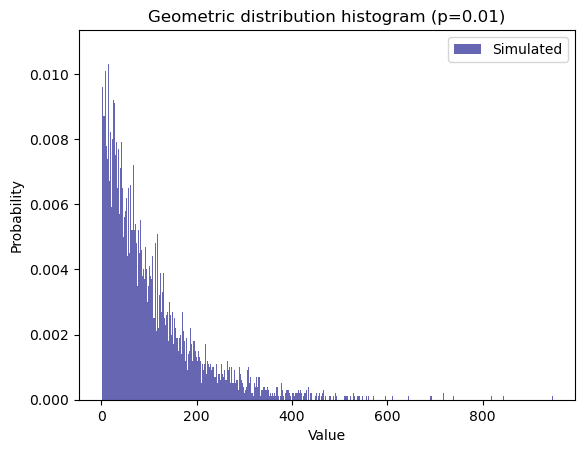

p = 0.01
Chi-square test p-value: 0.4279
Kolmogorov-Smirnov test p-value: 0.0076
----------------------------------------


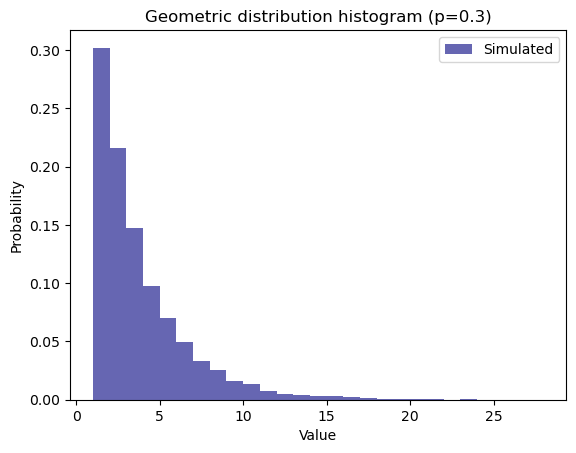

p = 0.3
Chi-square test p-value: 0.4208
Kolmogorov-Smirnov test p-value: 0.0000
----------------------------------------


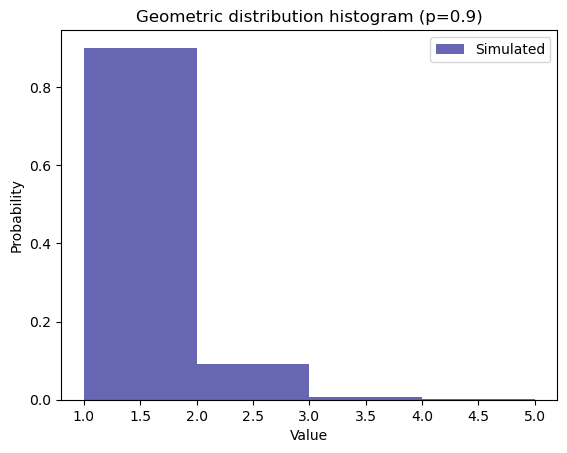

p = 0.9
Chi-square test p-value: 0.6652
Kolmogorov-Smirnov test p-value: 0.0000
----------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, chisquare, kstest

np.random.seed(237)
p_values = [0.01, 0.3, 0.9]

for p in p_values:
    samples = np.random.geometric(p, size=10000)

    # Histogram
    plt.figure()
    plt.hist(samples, bins=range(1, np.max(samples)+1), density=True, alpha=0.6, color='navy', label='Simulated')
    
    k = np.arange(1, np.max(samples)+1)
    theoretical_pmf = geom.pmf(k, p)
    #plt.plot(k, theoretical_pmf, '-', label='Theoretical', linewidth=1, color='darkred')
    
    plt.title(f'Geometric distribution histogram (p={p})')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

    # Chi-square test
    observed_counts, _ = np.histogram(samples, bins=range(1, np.max(samples)+2))
    expected_counts = geom.pmf(k, p) * len(samples)

    # Align lengths and apply threshold for expected counts > 5
    valid = expected_counts > 5
    obs_valid = observed_counts[valid]
    exp_valid = expected_counts[valid]

    # Rescale expected to match observed sum
    exp_valid = exp_valid * obs_valid.sum() / exp_valid.sum()

    chi_stat, chi_p = chisquare(f_obs=obs_valid, f_exp=exp_valid)

    # KS test (compare with CDF directly)
    ks_stat, ks_p = kstest(samples, geom(p).cdf)

    print(f"p = {p}")
    print(f"Chi-square test p-value: {chi_p:.4f}")
    print(f"Kolmogorov-Smirnov test p-value: {ks_p:.4f}")
    print("-" * 40)


#### Øvelse 2a

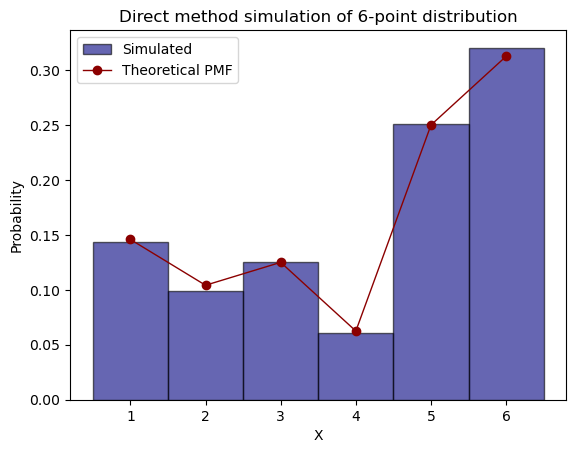

Chi-square test:
Statistic = 5.3755
p-value   = 0.3718


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

np.random.seed(237)

# Values and probabilities
X_values = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([7, 5, 6, 3, 12, 15]) / 48
cdf = np.cumsum(probs)

# Simulate using inverse transform
n = 10000
U = np.random.rand(n)
samples = np.zeros(n)

for i, u in enumerate(U):
    samples[i] = X_values[np.searchsorted(cdf, u)]

# Plot histogram
plt.hist(samples, bins=np.arange(1, 8)-0.5, edgecolor='black', density=True, label='Simulated', alpha=0.6, color='navy')
plt.xticks(X_values)
plt.plot(X_values, probs, 'o-', label='Theoretical PMF',color='darkred', linewidth=1)
plt.title('Direct method simulation of 6-point distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Chi-square test
observed_counts = np.array([(samples == x).sum() for x in X_values])
expected_counts = probs * n
chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Output result
print("Chi-square test:")
print(f"Statistic = {chi_stat:.4f}")
print(f"p-value   = {p_value:.4f}")


#### Øvelse 2b

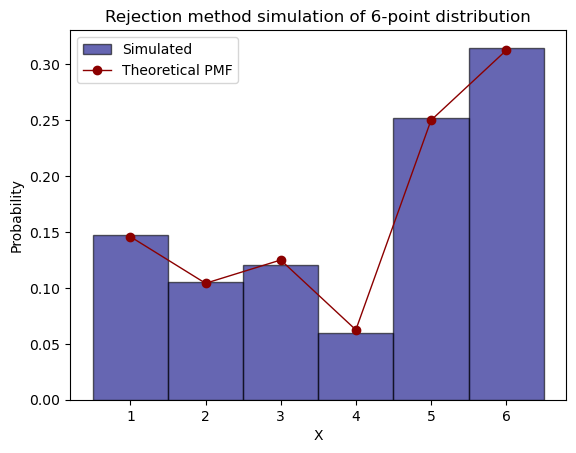

Chi-square test:
Statistic = 4.2080
p-value   = 0.5199


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

np.random.seed(237)

# Target distribution
X_values = np.array([1, 2, 3, 4, 5, 6])
p = np.array([7, 5, 6, 3, 12, 15]) / 48
q = np.ones(6) / 6
c = max(p / q)  # = 1.875

# Rejection sampling
n_samples = 10000
samples = []

while len(samples) < n_samples:
    x = np.random.randint(1, 7)  # Proposal from uniform 1-6
    u = np.random.rand()
    accept_prob = (p[x-1] / q[x-1]) / c
    if u <= accept_prob:
        samples.append(x)

samples = np.array(samples)

# Plot histogram
plt.hist(samples, bins=np.arange(1, 8)-0.5, edgecolor='black', density=True, label='Simulated', alpha=0.6, color='navy')
plt.xticks(X_values)
plt.plot(X_values, p, 'o-', label='Theoretical PMF', color='darkred', linewidth=1)
plt.title('Rejection method simulation of 6-point distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Chi-square test
observed_counts = np.array([(samples == x).sum() for x in X_values])
expected_counts = p * n_samples
chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print("Chi-square test:")
print(f"Statistic = {chi_stat:.4f}")
print(f"p-value   = {p_value:.4f}")


#### Øvelse 2c

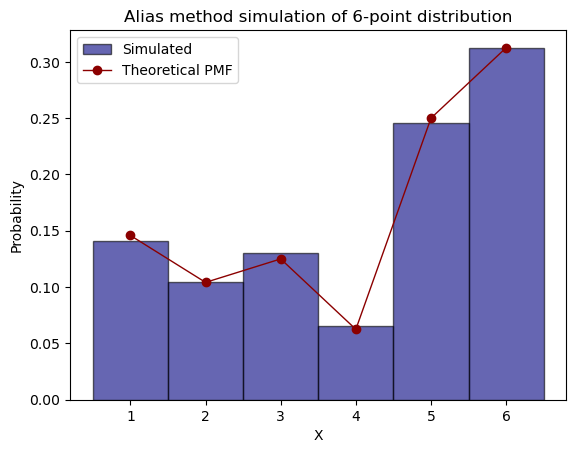

Chi-square test:
Statistic = 6.2063
p-value   = 0.2867


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

np.random.seed(237)

# Original distribution
X_values = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([7, 5, 6, 3, 12, 15]) / 48
k = len(probs)

# Step 1: Create alias tables
F = probs * k  # Scaled probabilities
L = np.arange(k)  # Initialize alias table

# Work lists
small = [i for i in range(k) if F[i] < 1]
large = [i for i in range(k) if F[i] >= 1]

while small and large:
    s = small.pop()
    l = large.pop()

    L[s] = l
    F[l] = F[l] - (1 - F[s])

    if F[l] < 1:
        small.append(l)
    else:
        large.append(l)

# Step 2: Sampling function
def alias_sample(n, F, L):
    samples = np.zeros(n, dtype=int)
    for i in range(n):
        I = int(np.floor(k * np.random.rand()))
        U = np.random.rand()
        if U < F[I]:
            samples[i] = I + 1
        else:
            samples[i] = L[I] + 1
    return samples

# Run simulation
n_samples = 10000
samples = alias_sample(n_samples, F, L)

# Histogram and comparison
plt.hist(samples, bins=np.arange(1, 8)-0.5, density=True, edgecolor='black', label='Simulated', alpha=0.6, color='navy')
plt.plot(X_values, probs, 'o-', label='Theoretical PMF', color='darkred', linewidth=1)
plt.xticks(X_values)
plt.title('Alias method simulation of 6-point distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Chi-square test
observed_counts = np.array([(samples == x).sum() for x in X_values])
expected_counts = probs * n_samples
chi_stat, p_val = chisquare(observed_counts, expected_counts)

print("Chi-square test:")
print(f"Statistic = {chi_stat:.4f}")
print(f"p-value   = {p_val:.4f}")


## Exercise 3

#### Exercise 3.1

Generate simulated values from the following distributions

A) Exponential distribution

b) Normal distribution (at least with standard Box-Mueller)

c) Pareto distribution, with β = 1 and experiment with different values of k values: k = 2.05, k = 2.5, k = 3 and k = 4.

Verify the results by comparing histograms with analytical results and perform tests for distribution type.

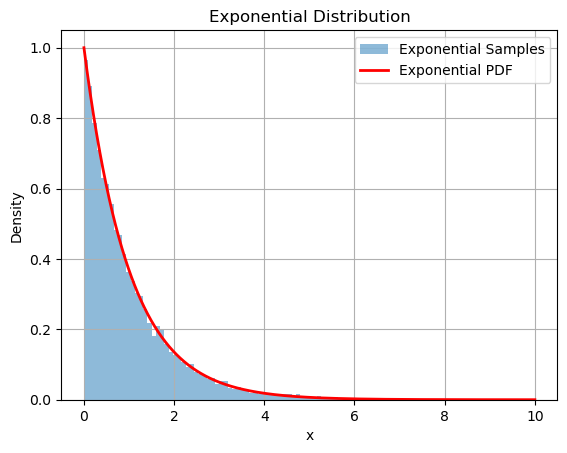

Exponential KS test: D = 0.0039, p = 0.9979


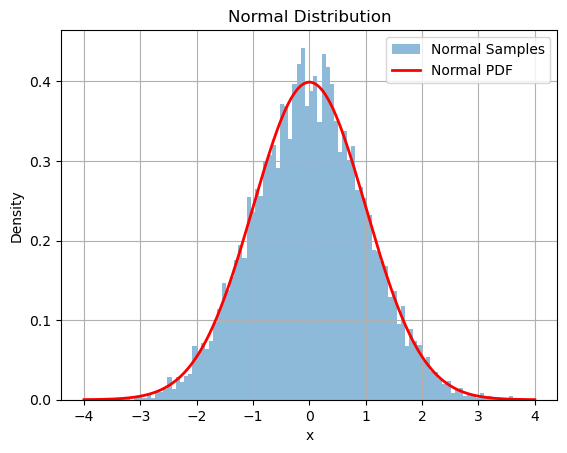

Normal KS test: D = 0.0084, p = 0.4777


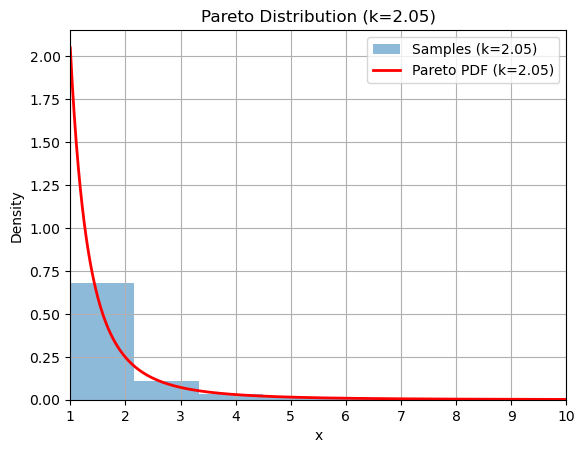

Pareto KS test (k=2.05): D = 0.0114, p = 0.1503


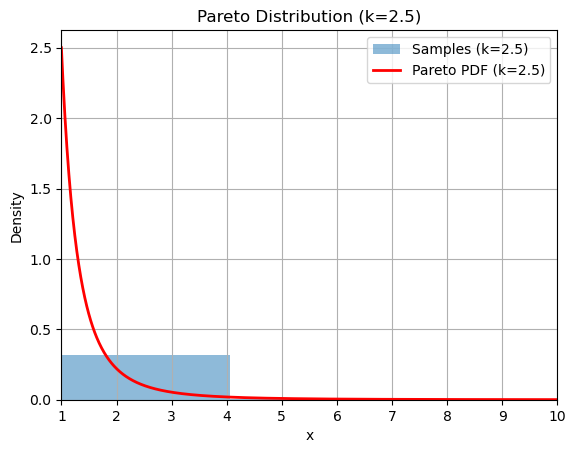

Pareto KS test (k=2.5): D = 0.0082, p = 0.5040


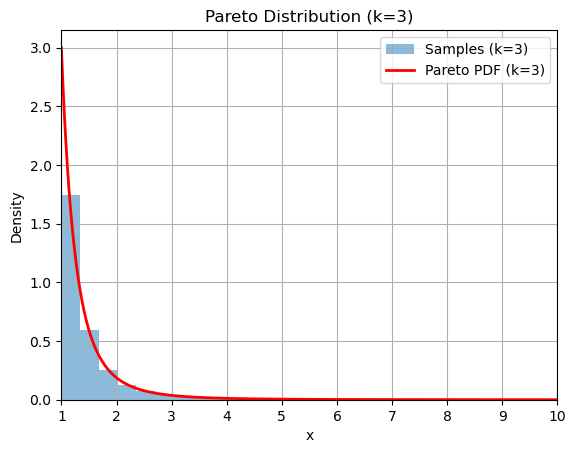

Pareto KS test (k=3): D = 0.0106, p = 0.2073


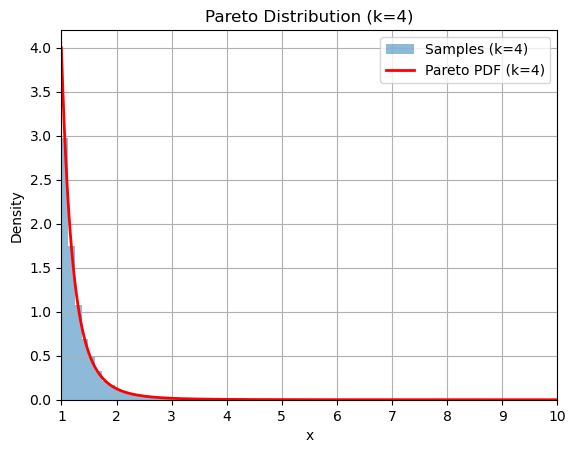

Pareto KS test (k=4): D = 0.0101, p = 0.2577


In [2]:
##### Histogram for all distributions #####

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, pareto, kstest

n = 10000
x_vals = np.linspace(0, 10, 1000)

### a) Exponential Distribution ###
lam = 1
exp_samples = np.random.exponential(scale=1/lam, size=n)

# Histogram + analytical PDF
plt.hist(exp_samples, bins=100, density=True, alpha=0.5, label='Exponential Samples')
plt.plot(x_vals, expon.pdf(x_vals, scale=1/lam), 'r-', lw=2, label='Exponential PDF')
plt.title("Exponential Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# KS test
d_exp, p_exp = kstest(exp_samples, 'expon', args=(0, 1/lam))
print(f"Exponential KS test: D = {d_exp:.4f}, p = {p_exp:.4f}")


### b) Normal Distribution ###
import numpy as np

def simulate_normal_box_muller(n):
    u1 = np.random.uniform(0, 1, n // 2)
    u2 = np.random.uniform(0, 1, n // 2)
    
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    
    z1 = r * np.cos(theta)
    z2 = r * np.sin(theta)
    
    samples = np.concatenate([z1, z2])
    
    if n % 2 == 1:
        # Generate one more if n is odd
        u1_extra = np.random.uniform(0, 1)
        u2_extra = np.random.uniform(0, 1)
        extra = np.sqrt(-2 * np.log(u1_extra)) * np.cos(2 * np.pi * u2_extra)
        samples = np.append(samples, extra)
    
    return samples

# Simulate 10,000 standard normal samples
norm_samples = simulate_normal_box_muller(10000)


# Histogram + analytical PDF
x_vals_n = np.linspace(-4, 4, 1000)
plt.hist(norm_samples, bins=100, density=True, alpha=0.5, label='Normal Samples')
plt.plot(x_vals_n, norm.pdf(x_vals_n, loc=0, scale=1), 'r-', lw=2, label='Normal PDF')
plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# KS test
d_norm, p_norm = kstest(norm_samples, 'norm', args=(0, 1))
print(f"Normal KS test: D = {d_norm:.4f}, p = {p_norm:.4f}")


### c) Pareto Distribution (for multiple k values) ###
k_values = [2.05, 2.5, 3, 4]
beta = 1.0
x_vals_p = np.linspace(1, 10, 1000)

for k in k_values:
    pareto_samples = beta * (np.random.uniform(0, 1, n) ** (-1 / k))
    
    # Histogram + analytical PDF
    plt.hist(pareto_samples, bins=100, density=True, alpha=0.5, label=f'Samples (k={k})')
    plt.plot(x_vals_p, pareto.pdf(x_vals_p, b=k, loc=0, scale=beta), 'r-', lw=2, label=f'Pareto PDF (k={k})')
    plt.title(f"Pareto Distribution (k={k})")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.xlim(1, 10)
    plt.show()
    
    # KS test
    d_pareto, p_pareto = kstest(pareto_samples, 'pareto', args=(k, 0, beta))
    print(f"Pareto KS test (k={k}): D = {d_pareto:.4f}, p = {p_pareto:.4f}")



#### 3.2) Pareto Distribution – Compare Mean and Variance

For the Pareto distribution with support on \([ \beta, \infty [\), compare the **mean** and **variance** of simulated samples with the analytical expressions. The analytical expressions are:

- **Expected value** (mean), for \( k > 1 \):

$\mathbb{E}(X) = \frac{\beta k}{k - 1}$

- **Variance**, for \( k > 2 \):

$
\text{Var}(X) = \frac{\beta^2 k}{(k - 1)^2 (k - 2)}
$

### Task:
- Simulate samples using NumPy’s Pareto generator
- Compute empirical mean and variance
- Compare with analytical results for several values of \( k \in \{2.05,\ 2.5,\ 3,\ 4\} \)
- Explain any problems that occur (e.g. infinite variance or unstable estimates)


In [3]:
import numpy as np

def pareto_theoretical_mean_var(beta, k):
    mean = np.inf if k <= 1 else beta * k / (k - 1)
    var = np.inf if k <= 2 else (beta**2 * k) / ((k - 1)**2 * (k - 2))
    return mean, var

def simulate_and_compare(k_values, beta=1.0, n=10000):
    for k in k_values:
        samples = beta * (np.random.pareto(k, n) + 1)
        empirical_mean = np.mean(samples)
        empirical_var = np.var(samples)

        mean_theory, var_theory = pareto_theoretical_mean_var(beta, k)

        print(f"\nPareto(k={k}):")
        print(f"  Empirical mean      = {empirical_mean:.4f}")
        print(f"  Theoretical mean    = {mean_theory:.4f}")
        print(f"  Empirical variance  = {empirical_var:.4f}")
        print(f"  Theoretical variance= {var_theory:.4f}")

# Run the comparison
k_values = [2.05, 2.5, 3, 4]
simulate_and_compare(k_values)



Pareto(k=2.05):
  Empirical mean      = 1.9591
  Theoretical mean    = 1.9524
  Empirical variance  = 5.5221
  Theoretical variance= 37.1882

Pareto(k=2.5):
  Empirical mean      = 1.6624
  Theoretical mean    = 1.6667
  Empirical variance  = 1.5831
  Theoretical variance= 2.2222

Pareto(k=3):
  Empirical mean      = 1.4932
  Theoretical mean    = 1.5000
  Empirical variance  = 0.7057
  Theoretical variance= 0.7500

Pareto(k=4):
  Empirical mean      = 1.3285
  Theoretical mean    = 1.3333
  Empirical variance  = 0.2280
  Theoretical variance= 0.2222


#### 3.3) For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.

In [33]:
import numpy as np
from scipy.stats import t, chi2

# Settings
seed = 42
np.random.seed(seed)
n_intervals = 100
sample_size = 10
mu_true = 0
sigma2_true = 1

mean_contains = 0
var_contains = 0

mean_intervals = []
var_intervals = []



for _ in range(n_intervals):
    sample = simulate_normal_box_muller(sample_size)
    # Calculate sample mean and unbiased variance
    x_bar = np.mean(sample)
    s2 = np.var(sample, ddof=1)  # unbiased variance

    # 95% CI for mean using t-distribution
    t_crit = t.ppf(0.975, df=sample_size - 1)
    se = np.sqrt(s2 / sample_size)
    mean_ci = (x_bar - t_crit * se, x_bar + t_crit * se)
    mean_contains += mean_ci[0] <= mu_true <= mean_ci[1]
    mean_intervals.append(mean_ci)

    # 95% CI for variance using chi-squared distribution
    chi2_lower = chi2.ppf(0.025, df=sample_size - 1)
    chi2_upper = chi2.ppf(0.975, df=sample_size - 1)
    var_ci = ((sample_size - 1) * s2 / chi2_upper, (sample_size - 1) * s2 / chi2_lower)
    var_contains += var_ci[0] <= sigma2_true <= var_ci[1]
    var_intervals.append(var_ci)

print(f"Mean: {mean_contains}/100 intervals contained μ = {mu_true}")
print(f"Variance: {var_contains}/100 intervals contained σ² = {sigma2_true}")


Mean: 96/100 intervals contained μ = 0
Variance: 93/100 intervals contained σ² = 1


#### 3.4) Simulate from the Pareto distribution using composition.

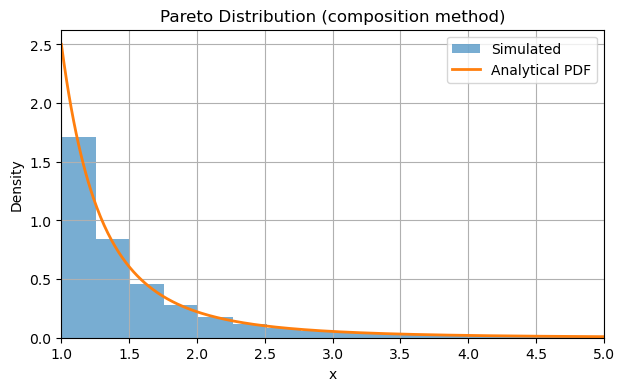

In [52]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(23798)

def pareto_composition(n, k=2.5, beta=1.0):
    u = np.random.uniform(0, 1, n)
    return beta * (u ** (-1 / k))

# Simulate samples
n = 10000
samples = pareto_composition(n, k=2.5, beta=1.0)

# Plot histogram and analytical PDF with subplots
x_vals = x_vals_p  # Use the already defined x_vals_p for consistency

plt.figure(figsize=(7, 4))
plt.hist(samples, bins=100, density=True, alpha=0.6, label='Simulated')
plt.plot(x_vals, (2.5 * 1.0**2.5) / (x_vals ** (2.5 + 1)) * (x_vals >= 1.0), label='Analytical PDF', linewidth=2)
plt.title('Pareto Distribution (composition method)')
plt.xlabel('x')
plt.ylabel('Density')
plt.xlim(1, 5)
plt.legend()
plt.grid(True)
plt.show()


## Exercise 4

#### Øvelse 1

In [5]:
import numpy as np
import heapq
from scipy.stats import norm
import math

np.random.seed(237)

# Parameters
m = 10
mean_service = 8
mean_interarrival = 1
num_customers = 10000
batches = 10

def simulate_batch():
    clock = 0
    busy_servers = 0
    blocked = 0
    event_list = []

    # Generate first arrival
    heapq.heappush(event_list, (np.random.exponential(mean_interarrival), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    # schedule departure
                    service_time = np.random.exponential(mean_service)
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                # schedule next arrival
                heapq.heappush(event_list, (clock + np.random.exponential(mean_interarrival), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    return blocked / num_customers

# Run simulation over batches
fractions = [simulate_batch() for _ in range(batches)]
mean_block = np.mean(fractions)
std_block = np.std(fractions, ddof=1)
conf_level = 0.95
t_value = norm.ppf(1 - (1 - conf_level) / 2)
ci_half_width = t_value * std_block / np.sqrt(batches)

print(f"Estimated blocking probability: {mean_block:.4f}")
print(f"{int(conf_level*100)}% CI: [{mean_block - ci_half_width:.4f}, {mean_block + ci_half_width:.4f}]")


Estimated blocking probability: 0.1200
95% CI: [0.1159, 0.1241]


#### Erlang B theory

In [6]:
from math import factorial

def erlang_b(m, A):
    numerator = A**m / factorial(m)
    denominator = sum((A**k) / factorial(k) for k in range(m + 1))
    return numerator / denominator

print(f"Erlang B (exact): {erlang_b(10, 8):.4f}")

Erlang B (exact): 0.1217


#### Øvelse 2a

In [7]:
import numpy as np
import heapq
from scipy.stats import norm

np.random.seed(237)

# Parameters
m = 10  # number of servers
mean_service = 8
num_customers = 10000
batches = 10
shape_k = 2  # Erlang shape parameter
lambda_erlang = shape_k  # to keep mean = 1

def erlang_arrival(mean=1):
    """Generate one Erlang(k, lambda) arrival time"""
    return np.sum(np.random.exponential(1 / lambda_erlang, shape_k))

def simulate_batch_erlang():
    clock = 0
    busy_servers = 0
    blocked = 0
    event_list = []

    # First arrival
    heapq.heappush(event_list, (erlang_arrival(), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    service_time = np.random.exponential(mean_service)
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                heapq.heappush(event_list, (clock + erlang_arrival(), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    return blocked / num_customers

# Run simulation in batches
fractions = [simulate_batch_erlang() for _ in range(batches)]
mean_block = np.mean(fractions)
std_block = np.std(fractions, ddof=1)
t_value = norm.ppf(0.975)
ci_half_width = t_value * std_block / np.sqrt(batches)

print(f"Erlang Interarrival (k={shape_k})")
print(f"Estimated blocking probability: {mean_block:.4f}")
print(f"95% CI: [{mean_block - ci_half_width:.4f}, {mean_block + ci_half_width:.4f}]")


Erlang Interarrival (k=2)
Estimated blocking probability: 0.0937
95% CI: [0.0917, 0.0958]


#### Øvelse 2b

In [8]:
import numpy as np
import heapq
from scipy.stats import norm

np.random.seed(237)

# Parameters
m = 10
mean_service = 8
num_customers = 10000
batches = 10

# Hyper-exponential parameters
p1, lambda1 = 0.8, 0.8333
p2, lambda2 = 0.2, 5.0

def hyper_exponential_arrival():
    """Generate one hyper-exponential inter-arrival time"""
    if np.random.rand() < p1:
        return np.random.exponential(1 / lambda1)
    else:
        return np.random.exponential(1 / lambda2)

def simulate_batch_hyperexp():
    clock = 0
    busy_servers = 0
    blocked = 0
    event_list = []

    heapq.heappush(event_list, (hyper_exponential_arrival(), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    service_time = np.random.exponential(mean_service)
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                heapq.heappush(event_list, (clock + hyper_exponential_arrival(), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    return blocked / num_customers

# Run simulation in batches
fractions = [simulate_batch_hyperexp() for _ in range(batches)]
mean_block = np.mean(fractions)
std_block = np.std(fractions, ddof=1)
t_value = norm.ppf(0.975)
ci_half_width = t_value * std_block / np.sqrt(batches)

print("Hyper-exponential Interarrival")
print(f"Estimated blocking probability: {mean_block:.4f}")
print(f"95% CI: [{mean_block - ci_half_width:.4f}, {mean_block + ci_half_width:.4f}]")


Hyper-exponential Interarrival
Estimated blocking probability: 0.1394
95% CI: [0.1356, 0.1432]


#### Øvelse 3

In [9]:
import numpy as np
import heapq
from scipy.stats import norm

np.random.seed(237)

# Constants
m = 10
mean_service = 8
num_customers = 10000
batches = 10

def exponential_arrival():
    return np.random.exponential(1)

def constant_service():
    return mean_service

def pareto_service(k):
    xm = mean_service * (k - 1) / k  # To get E[X] = mean_service
    return (np.random.pareto(k) + 1) * xm

# Compute mu for given sigma
sigma_logn = 0.6
mu_logn = np.log(mean_service) - 0.5 * sigma_logn**2

def lognormal_service():
    return np.random.lognormal(mean=mu_logn, sigma=sigma_logn)

def simulate_batch(service_sampler):
    clock = 0
    busy_servers = 0
    blocked = 0
    event_list = []

    heapq.heappush(event_list, (exponential_arrival(), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    service_time = service_sampler()
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                heapq.heappush(event_list, (clock + exponential_arrival(), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    return blocked / num_customers

def simulate_all(service_sampler, label):
    fractions = [simulate_batch(service_sampler) for _ in range(batches)]
    mean_block = np.mean(fractions)
    std_block = np.std(fractions, ddof=1)
    t_value = norm.ppf(0.975)
    ci_half_width = t_value * std_block / np.sqrt(batches)
    print(f"{label}")
    print(f"Estimated blocking probability: {mean_block:.4f}")
    print(f"95% CI: [{mean_block - ci_half_width:.4f}, {mean_block + ci_half_width:.4f}]")
    print()

# Run simulations
simulate_all(constant_service, "Constant service time")
simulate_all(lambda: pareto_service(1.05), "Pareto service time (k=1.05)")
simulate_all(lambda: pareto_service(2.05), "Pareto service time (k=2.05)")
simulate_all(lambda: lognormal_service(), "Lognormal service time (sigma=0.6)")



Constant service time
Estimated blocking probability: 0.1211
95% CI: [0.1170, 0.1252]

Pareto service time (k=1.05)
Estimated blocking probability: 0.0026
95% CI: [0.0008, 0.0043]

Pareto service time (k=2.05)
Estimated blocking probability: 0.1234
95% CI: [0.1188, 0.1280]

Lognormal service time (sigma=0.6)
Estimated blocking probability: 0.1203
95% CI: [0.1176, 0.1231]



## Exercise 5

**Variance Reduction Methods**

1. **Estimate the integral**  
   $ \int_0^1 e^x \, dx $  
   by simulation (the crude Monte Carlo estimator).  
   Use an estimator based on 100 samples and present the result as both a point estimator and a confidence interval.



In [5]:
import numpy as np
from scipy.stats import norm

# Settings
n = 100
seed = 42
np.random.seed(seed)
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Crude Monte Carlo estimation
x = np.random.uniform(0, 1, n)
fx = np.exp(x)
estimate = np.mean(fx)
std_error = np.std(fx, ddof=1) / np.sqrt(n)

# Confidence interval
ci_lower = estimate - z * std_error
ci_upper = estimate + z * std_error

# True value (for reference)
true_value = np.exp(1) - 1

# Print results
print(f"Crude Monte Carlo estimate: {estimate:.5f}")
print(f"95% CI: ({ci_lower:.5f}, {ci_upper:.5f})")
print(f"True value: {true_value:.5f}")


Crude Monte Carlo estimate: 1.67206
95% CI: (1.57404, 1.77009)
True value: 1.71828


2. **Estimate the integral**  
   $ \int_0^1 e^x \, dx $  
   using **antithetic variables**, with comparable computational resources.



In [7]:
import numpy as np
from scipy.stats import norm

# Settings
seed = 42
np.random.seed(seed)
n = 50  # 50 pairs → 100 function evaluations
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Antithetic sampling
u = np.random.uniform(0, 1, n)
antithetic = 0.5 * (np.exp(u) + np.exp(1 - u))

# Estimate and confidence interval
estimate = np.mean(antithetic)
std_error = np.std(antithetic, ddof=1) / np.sqrt(n)
ci_lower = estimate - z * std_error
ci_upper = estimate + z * std_error

# True value
true_value = np.exp(1) - 1

# Print results
print(f"Antithetic estimate: {estimate:.5f}")
print(f"95% CI: ({ci_lower:.5f}, {ci_upper:.5f})")
print(f"True value: {true_value:.5f}")


Antithetic estimate: 1.71943
95% CI: (1.70197, 1.73689)
True value: 1.71828


3. **Estimate the integral**  
   $ \int_0^1 e^x \, dx $  
   using a **control variable**, with comparable computational resources.



In [8]:
import numpy as np
from scipy.stats import norm

# Settings
seed = 42
np.random.seed(seed)
n = 100
alpha = 0.05
z = norm.ppf(1 - alpha / 2)

# Generate data
x = np.random.uniform(0, 1, n)
y = np.exp(x)
g = x
mu_g = 0.5

# Estimate optimal c from sample
cov_y_g = np.cov(y, g, ddof=1)[0, 1]
var_g = np.var(g, ddof=1)
c_opt = cov_y_g / var_g

# Apply control variate correction
adjusted_y = y - c_opt * (g - mu_g)

# Estimate and confidence interval
estimate = np.mean(adjusted_y)
std_error = np.std(adjusted_y, ddof=1) / np.sqrt(n)
ci_lower = estimate - z * std_error
ci_upper = estimate + z * std_error

# True value
true_value = np.exp(1) - 1

# Print results
print(f"Control variate estimate: {estimate:.5f}")
print(f"95% CI: ({ci_lower:.5f}, {ci_upper:.5f})")
print(f"True value: {true_value:.5f}")


Control variate estimate: 1.72180
95% CI: (1.70963, 1.73398)
True value: 1.71828


4. **Estimate the integral**  
   $ \int_0^1 e^x \, dx $  
   using **stratified sampling**, with comparable computational resources.



In [10]:
import numpy as np
from scipy.stats import norm

# Settings
seed = 42
np.random.seed(seed)
m = 100  # number of strata = number of samples
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Stratified sampling
samples = np.array([
    np.random.uniform(i/m, (i+1)/m) for i in range(m)
])
fx = np.exp(samples)

# Estimate and CI
estimate = np.mean(fx)
std_error = np.std(fx, ddof=1) / np.sqrt(m)
ci_lower = estimate - z * std_error
ci_upper = estimate + z * std_error

# True value
true_value = np.exp(1) - 1

# Print results
print(f"Stratified sampling estimate: {estimate:.5f}")
print(f"95% CI: ({ci_lower:.5f}, {ci_upper:.5f})")
print(f"True value: {true_value:.5f}")


Stratified sampling estimate: 1.71779
95% CI: (1.62091, 1.81468)
True value: 1.71828


5. **Use control variates** to reduce the variance of the estimator in Exercise 4 (Poisson arrivals).



In [3]:
import numpy as np
import heapq
from scipy.stats import norm

np.random.seed(237)

# Parameters
m = 10
mean_service = 8
mean_interarrival = 1
num_customers = 10000
batches = 10

# Storage
blocks = []
controls = []

def simulate_batch():
    clock = 0
    busy_servers = 0
    blocked = 0
    control_stat = 0
    event_list = []

    # First arrival
    heapq.heappush(event_list, (np.random.exponential(mean_interarrival), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    service_time = np.random.exponential(mean_service)
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                    control_stat += 1  # add to control variable
                heapq.heappush(event_list, (clock + np.random.exponential(mean_interarrival), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    blocks.append(blocked / num_customers)
    controls.append(control_stat / num_customers)  # normalize for consistency

# Run batches
for _ in range(batches):
    simulate_batch()

# Control variate adjustment
Y = np.array(blocks)
X = np.array(controls)
mu_X = np.mean(X)  # Could use analytical if known

# Estimate optimal c
cov_YX = np.cov(Y, X, ddof=1)[0, 1]
var_X = np.var(X, ddof=1)
c_opt = cov_YX / var_X

# Apply control variate correction
Y_cv = Y - c_opt * (X - mu_X)

# Estimate
mean_naive = np.mean(Y)
mean_cv = np.mean(Y_cv)
std_naive = np.std(Y, ddof=1)
std_cv = np.std(Y_cv, ddof=1)
conf_level = 0.95
z = norm.ppf(1 - (1 - conf_level) / 2)
ci_naive = (mean_naive - z * std_naive / np.sqrt(batches),
            mean_naive + z * std_naive / np.sqrt(batches))
ci_cv = (mean_cv - z * std_cv / np.sqrt(batches),
         mean_cv + z * std_cv / np.sqrt(batches))

# Results
print(f"Naive estimate: {mean_naive:.5f} ± {z * std_naive / np.sqrt(batches):.5f}")
print(f"CV estimate   : {mean_cv:.5f} ± {z * std_cv / np.sqrt(batches):.5f}")
print(f"95% CI (naive): [{ci_naive[0]:.5f}, {ci_naive[1]:.5f}]")
print(f"95% CI (CV)   : [{ci_cv[0]:.5f}, {ci_cv[1]:.5f}]")


Naive estimate: 0.12002 ± 0.00410
CV estimate   : 0.12002 ± 0.00000
95% CI (naive): [0.11592, 0.12412]
95% CI (CV)   : [0.12002, 0.12002]


6. **Demonstrate the effect of using common random numbers** in Exercise 4 for:
   - The difference between Poisson arrivals (**Part 1**), and  
   - A **renewal process with hyperexponential interarrival times**.  

   **Remark:** You might need to do some thinking and some re-programming.

In [4]:
import numpy as np
import heapq

np.random.seed(237)

# Parameters
m = 10
mean_service = 8
num_customers = 10000

# Hyperexponential parameters
p1, lambda1 = 0.8, 0.8333
p2, lambda2 = 0.2, 5.0

# Generate common random numbers
service_times = np.random.exponential(mean_service, size=num_customers)
u_hyper_choice = np.random.rand(num_customers)
expo1 = np.random.exponential(1 / lambda1, size=num_customers)
expo2 = np.random.exponential(1 / lambda2, size=num_customers)
interarrivals_poisson = np.random.exponential(1, size=num_customers)

interarrivals_hyper = np.where(u_hyper_choice < p1, expo1, expo2)

arrival_poisson = np.cumsum(interarrivals_poisson)
arrival_hyper = np.cumsum(interarrivals_hyper)

def simulate_blocking(arrival_times, service_times, m):
    clock = 0
    busy = 0
    blocked = 0
    queue = []

    i = 0  # index into arrival_times
    event_list = []

    heapq.heappush(event_list, (arrival_times[0], 'arrival', 0))

    while i < len(arrival_times) or event_list:
        time, event, idx = heapq.heappop(event_list)
        clock = time

        if event == 'arrival':
            if busy < m:
                busy += 1
                heapq.heappush(event_list, (clock + service_times[idx], 'departure', idx))
            else:
                blocked += 1
            i += 1
            if i < len(arrival_times):
                heapq.heappush(event_list, (arrival_times[i], 'arrival', i))
        elif event == 'departure':
            busy -= 1

    return blocked / num_customers

# Run both simulations with CRNs
block_poisson = simulate_blocking(arrival_poisson, service_times, m)
block_hyper = simulate_blocking(arrival_hyper, service_times, m)

print(f"Blocking (Poisson): {block_poisson:.4f}")
print(f"Blocking (Hyperexp): {block_hyper:.4f}")
print(f"Difference (CRNs): {block_poisson - block_hyper:.4f}")


Blocking (Poisson): 0.1245
Blocking (Hyperexp): 0.1411
Difference (CRNs): -0.0166


7. **For a standard normal random variable** $Z \sim \mathcal{N}(0, 1)$ using the crude Monte Carlo estimator, estimate the probability $Z > a$.  
   Then try **importance sampling** with a normal density with mean $a$ and variance $\sigma^2$.  
   For the experiments, start using $\sigma^2 = 1$, use different values of $a$ (e.g. 2 and 4), and different sample sizes.  
   If time permits, experiment with other values for $\sigma^2$.  
   Finally, discuss the efficiency of the methods.




In [17]:
import numpy as np
from scipy.stats import norm

seed = 237
np.random.seed(seed)

# Parameters
a = 4
n = 10000
sigma2 = 1

# --- Crude Monte Carlo ---
z = np.random.normal(0, 1, size=n)
p_crude = np.mean(z > a)
se_crude = np.std(z > a, ddof=1) / np.sqrt(n)

# --- Importance Sampling ---
x = np.random.normal(a, np.sqrt(sigma2), size=n)
# likelihood ratio for sigma^2 = 1
weights = np.exp((x - a)**2 / 2 - x**2 / 2)
p_is = np.mean((x > a) * weights)
se_is = np.std((x > a) * weights, ddof=1) / np.sqrt(n)

# True value
p_true = 1 - norm.cdf(a)

print(f"True value: {p_true:.8f}")
print(f"Crude MC:  {p_crude:.8f} ± {1.96 * se_crude:.8f}")
print(f"IS MC:     {p_is:.8f} ± {1.96 * se_is:.8f}")


True value: 0.00003167
Crude MC:  0.00000000 ± 0.00000000
IS MC:     0.00003117 ± 0.00000133


8. **Use importance sampling** with $g(x) = \lambda \exp(-\lambda x)$ to calculate the integral  
   $\int_0^1 e^x dx$ of Question 1.  
   Try to find the optimal value of $\lambda$ by calculating the variance of  
   $h(X) f(X)/g(X)$ and verify by simulation.  
   **Note:** importance sampling with the exponential distribution will not reduce the variance.



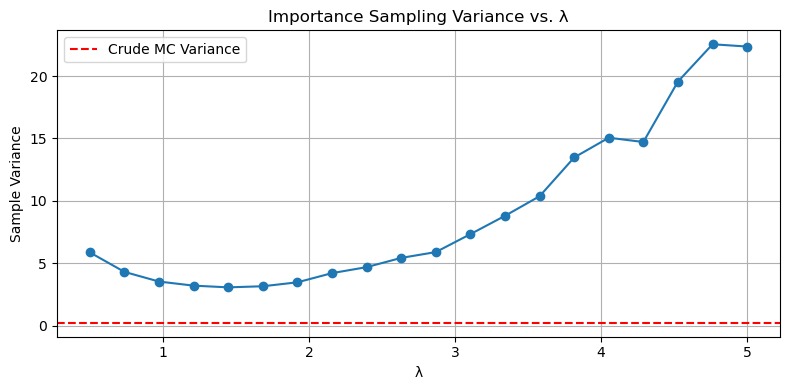

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def is_estimate(lambda_val, n_samples=10000):
    # Sample from Exponential(lambda)
    x = np.random.exponential(scale=1/lambda_val, size=n_samples)
    # Weight function: integrand (e^x) * indicator / g(x)
    weights = (x <= 1) * np.exp(x) / (lambda_val * np.exp(-lambda_val * x))
    estimate = np.mean(weights)
    variance = np.var(weights, ddof=1)
    return estimate, variance

# Try different lambda values
lambdas = np.linspace(0.5, 5, 20)
estimates = []
variances = []

for lam in lambdas:
    est, var = is_estimate(lam)
    estimates.append(est)
    variances.append(var)

# Plot variance vs. lambda
plt.figure(figsize=(8, 4))
plt.plot(lambdas, variances, marker='o')
plt.axhline(y=0.242, color='r', linestyle='--', label='Crude MC Variance')
plt.title('Importance Sampling Variance vs. λ')
plt.xlabel('λ')
plt.ylabel('Sample Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


9. **For the Pareto case**, derive the IS estimator for the mean using the **first moment distribution** as the sampling distribution.  
   Is the approach meaningful? Could this be done in general?  
   With this insight, how could you change the choice of $g(x)$ in the previous question?